In [1]:
import activations
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Activations = activations.Activations

In [2]:
basepath = '../../trained_models/'
file = 'plane/steps_20_batch_200_RNN_512_relu_rf_005_DoG_True_plane_lr_00001_weight_decay_00001/activations.npy'
path = basepath + file

In [3]:
ratemaps = np.load(path)

In [4]:
activations = Activations(ratemaps)

In [5]:
sacs = activations.calculate_sacs()

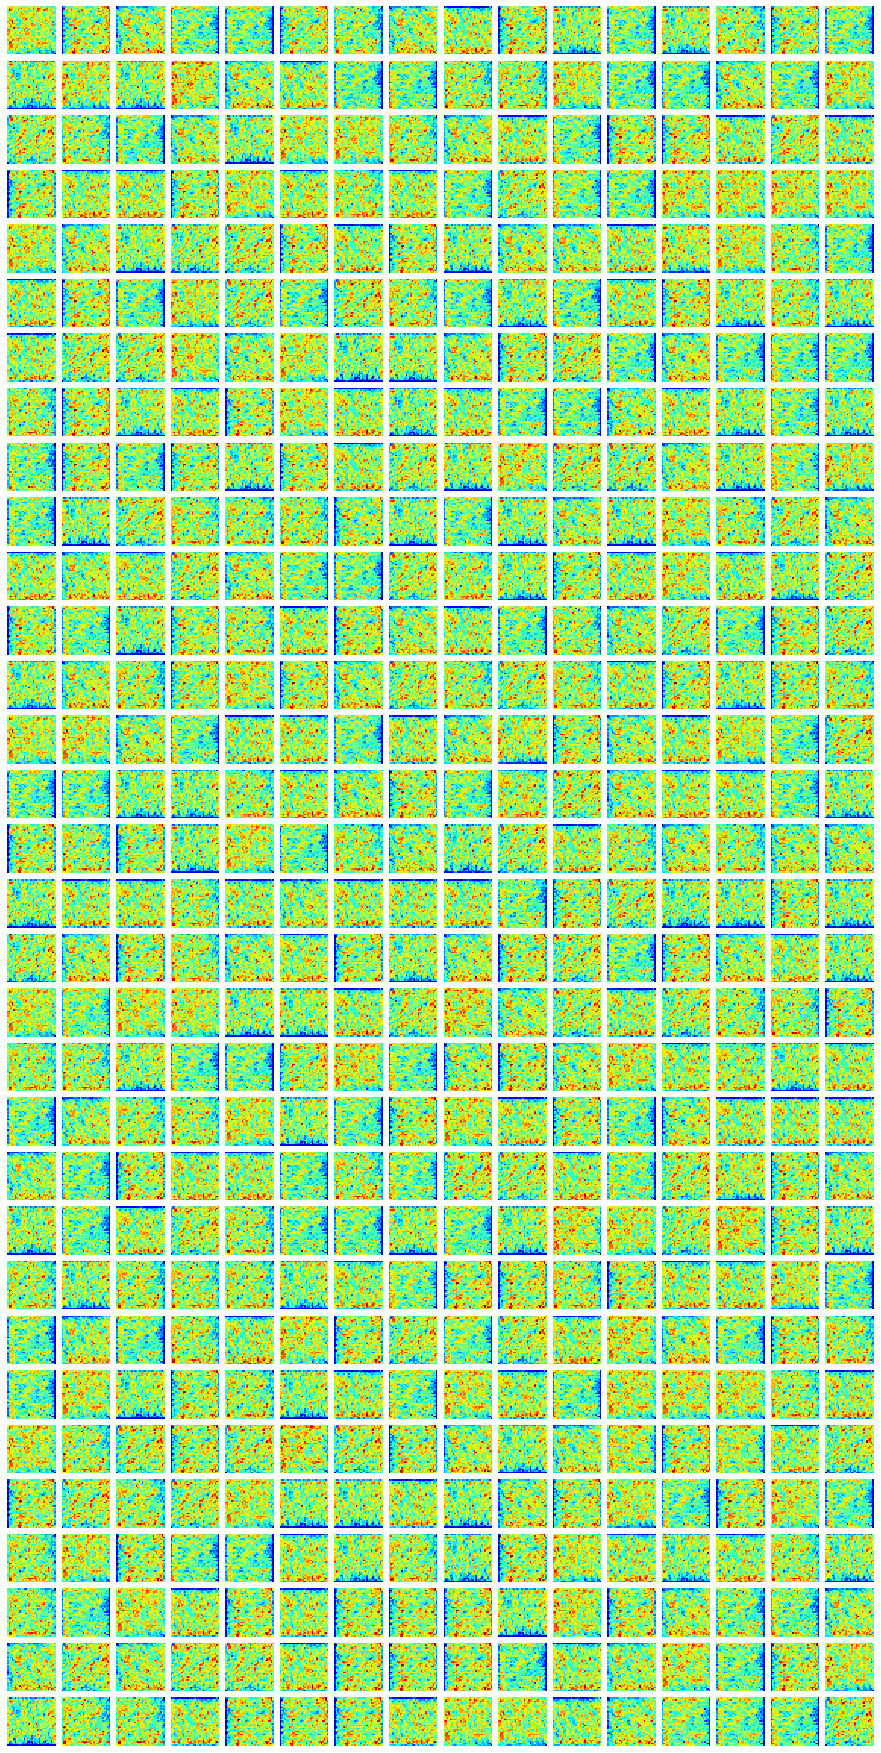

In [6]:
activations.vizall(activations.ratemaps_)

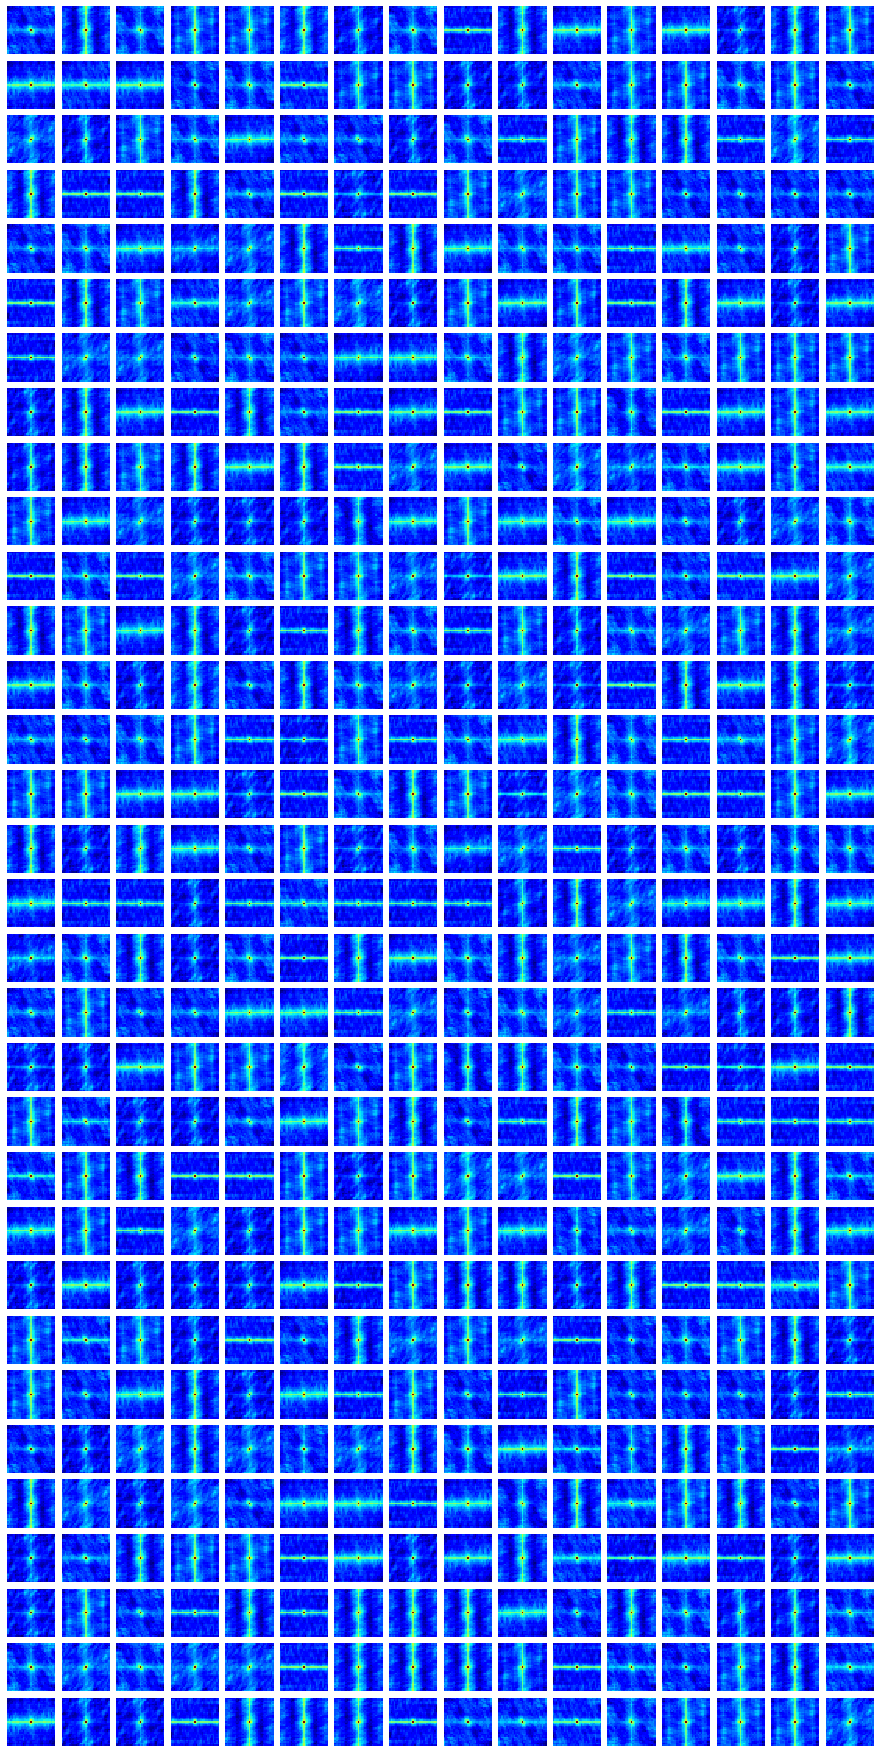

In [7]:
activations.vizall(activations.sacs_)

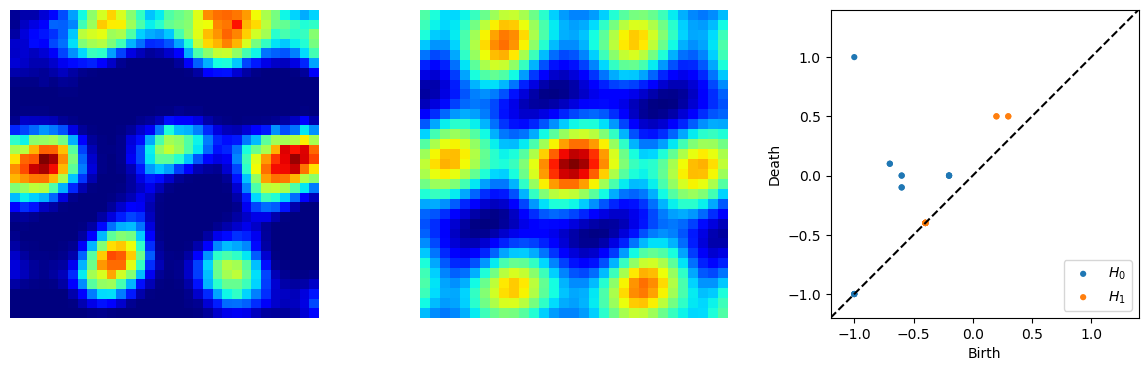

In [44]:
dgms = activations.calculate_dgms(digits=1)

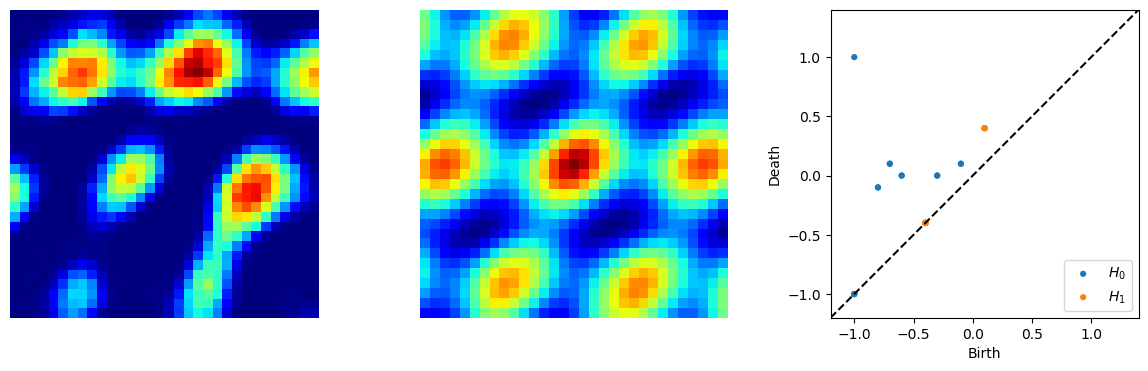

In [51]:
activations.plot_rm_sac_dgm(72)

In [41]:
from gtda.diagrams import PairwiseDistance

In [56]:
idxs = [32,62,72,0,9,14,16,20,36,8,5,2]
idxsv = [32,62,72,0,9,14,16,20,36,8,5,2,0,0,0,0,32,62,72,0,9,14,16,20,36,8,5,2,0,0,0,0]

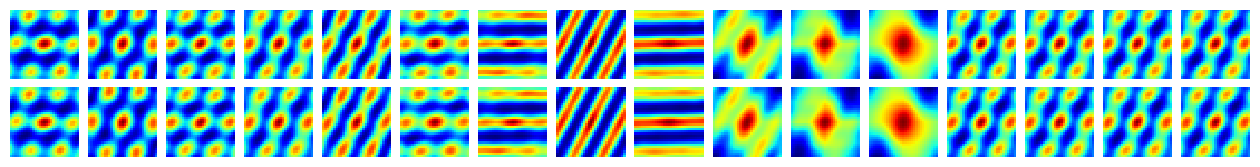

In [57]:
activations.vizall(sacs[idxsv])

In [58]:
metric = 'bottleneck'
pdist = PairwiseDistance(metric=metric,order=None,n_jobs=-1)

In [60]:
D = pdist.fit_transform(dgms[idxs])

In [61]:
D.shape

(12, 12, 2)

In [89]:
D[:,:,1].max()

0.151171875

In [91]:
ranged0 = D[:,:,0].max()-D[:,:,0].min()
ranged1 = D[:,:,1].max()-D[:,:,1].min()

In [92]:
ranged0, ranged1

(0.751953125, 0.151171875)

In [94]:
scale = ranged0/ranged1

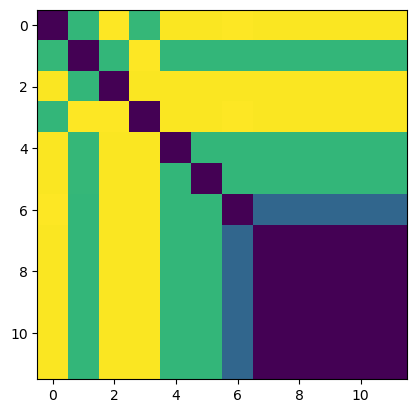

In [96]:
plt.imshow(D[:,:,1]*scale)

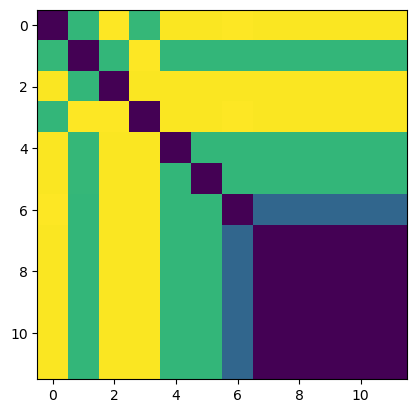

In [97]:
plt.imshow(D[:,:,1])

In [111]:
Dscaled = np.stack((D[:,:,0],D[:,:,1]*scale))

In [112]:
Dscaled.shape

(2, 12, 12)

In [106]:
D.shape

(12, 12, 2)